In [32]:
from bs4 import BeautifulSoup
import requests, pandas as pd, matplotlib.pyplot as plt, numpy as np, lxml.html as lh

In [33]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
page=requests.get(url)
soup=BeautifulSoup(page.text,'html.parser')
#print(soup.prettify())
c=soup.get_text()
a=c.split('\n')
a=a[:-2]
#print(a[0])
#print(type(a))
#print(a)
#print(a[0].split(','))
#print(type(a[0]))
#print(len(a))
#for t in a:
    #print (t,len(t))
col=[]
tr=['one','two','three','four','five']
#print(type(tr))
for t in tr:
    col.append((t,[]))
#print(col)
for j in range(0,len(a)):
    T=a[j].split(',')
    #print(T)
    i=0
    for t in T:
        try:
            t=float(t)
        except:
            pass
        #print(t,i)
        col[i][1].append(t)
        i+=1
    #print()
#print(type(col[0][0]))
Dict={title:value for (title,value) in col}
df=pd.DataFrame(Dict)
df.head()

,one,two,three,four,five
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.to_csv('Iris.csv')

In [35]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [36]:
from sklearn.preprocessing import LabelEncoder
le_y=LabelEncoder()
y=le_y.fit_transform(y)
#print(y)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [19]:
#Logistic Regression
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression(random_state=0)

#SVM Classifier
#from sklearn.svm import SVC
#classifier=SVC(kernel='linear',random_state=0)

#SVM Classifier Kernel
#from sklearn.svm import SVC
#classifier=SVC(kernel='rbf',random_state=0)

#Naive Bayes
#from sklearn.naive_bayes import GaussianNB
#classifier=GaussianNB()

#Decision Trees
#from sklearn.tree import DecisionTreeClassifier
#classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

#Random Forest 
#from sklearn.ensemble import RandomForestClassifier
#classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

#classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
#y_pred=classifier.predict(x_test)

#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_pred)
#print(cm)



[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


Logistic Regression model.

Correct Predictions = 26.

Incorrect Predictions = 4.

Accuracy = 26/30 = 86.7%.

SVM classifier model.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.

SVM classifier model (kernel).

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.

Naive Bayes classifier model.

Correct Predictions = 29.

Incorrect Predictions = 1.

Accuracy = 29/30 = 96.67%.

Decision Tree Classifier.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.

Random Forest classifier model.

Correct Predictions = 29.

Incorrect Predictions = 1.

Accuracy = 29/30 = 96.67%.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E75AD94908>,
      dtype=object)

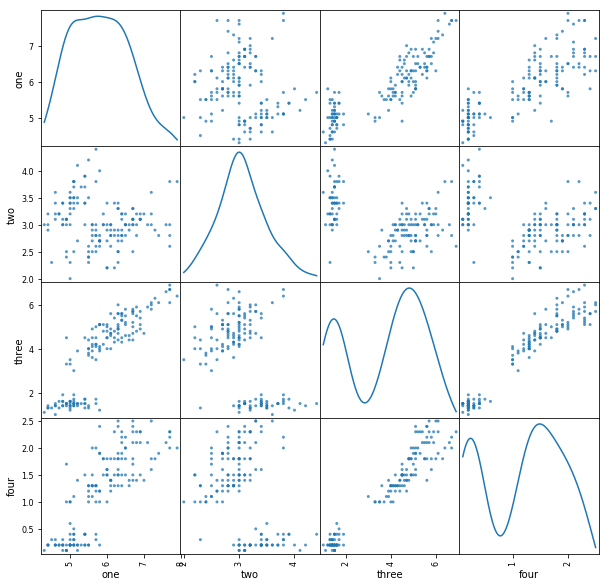

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[tr[:-1]],alpha=0.75,figsize=(10,10),diagonal='kde')

In [50]:
#LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda=LDA(n_components=2)
#x_train=lda.fit_transform(x_train,y_train)
#x_test=lda.transform(x_test)
#print(x_train)
#print(x_test)

In [70]:
#Logistic Regression
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression(random_state=0)

#SVM Classifier
#from sklearn.svm import SVC
#classifier=SVC(kernel='linear',random_state=0)

#SVM Classifier Kernel
#from sklearn.svm import SVC
#classifier=SVC(kernel='rbf',random_state=0)

#Naive Bayes
#from sklearn.naive_bayes import GaussianNB
#classifier=GaussianNB()

#Decision Trees
#from sklearn.tree import DecisionTreeClassifier
#classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

#Random Forest 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
y_pred=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Text(0,0.5,'LD2')

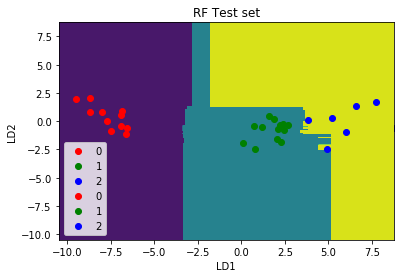

In [74]:
from matplotlib.colors import ListedColormap
#plt.subplot(2,1,1)
x_set,y_set=x_train,y_train
x1,y1=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,y1,classifier.predict(np.array([x1.ravel(),y1.ravel()]).T).reshape(x1.shape))
plt.xlim(x1.min(),x1.max())
plt.ylim(y1.min(),y1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.legend()
plt.title('RF Training set')
plt.xlabel('LD1')
plt.ylabel('LD2')

#plt.subplot(2,1,2)
x_set,y_set=x_test,y_test
x1,y1=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,y1,classifier.predict(np.array([x1.ravel(),y1.ravel()]).T).reshape(x1.shape))
plt.xlim(x1.min(),x1.max())
plt.ylim(y1.min(),y1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.legend()
plt.title('RF Test set')
plt.xlabel('LD1')
plt.ylabel('LD2')

#plt.show()

Logistic Regression model.

Correct Predictions = 26.

Incorrect Predictions = 4.

Accuracy = 26/30 = 86.7%.
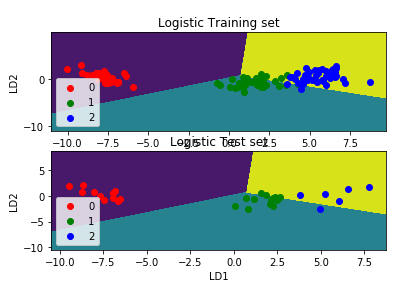


SVM classifier model.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.
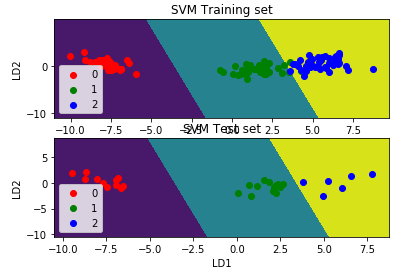

SVM classifier model (kernel).

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.
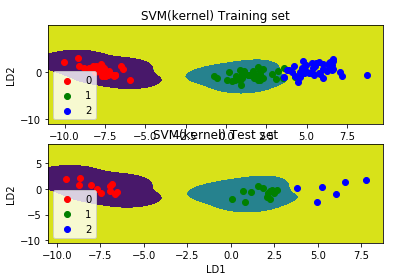

NB classifier model.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.
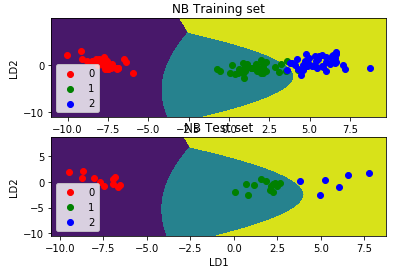

Decision Tree Classifier.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.
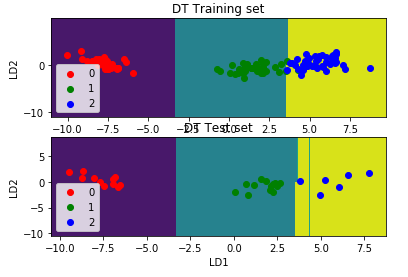

Random Forest Classifier.

Correct Predictions = 30.

Incorrect Predictions = 0.

Accuracy = 30/30 = 100%.
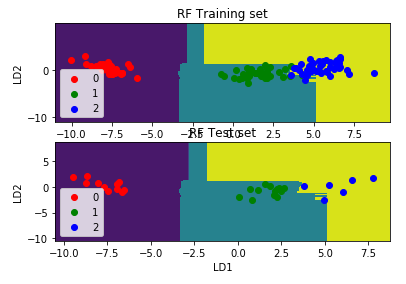

It is clearly visible that Logistic regression model (86.67% accuracy) and SVM (linear kernel) classifier (100% accuracy) are the right models for the job.

SVM (kernel), Decision Tree, Naive Bayes, Random Forest also have high accuracies, they are overfitting the data and hence are not the right choice.

LDA is applied to dataset to reduce the variables to 2D for easy visulization of the dataset.

It is clearly visible that the red points for "Iris-setosa" are at a good distance from the the other two classes which means that they probably do not share any property in common with each other. 

However, "Iris-versicolor" and "Iris-virginica" are the two classes which, according to the 2D scatter plot, seem to share some common qualities in them. 
             
To know whether this hypothesis is actually true or not, the 3 classes are drawn in 3D plots to have even a better visualization of the results.

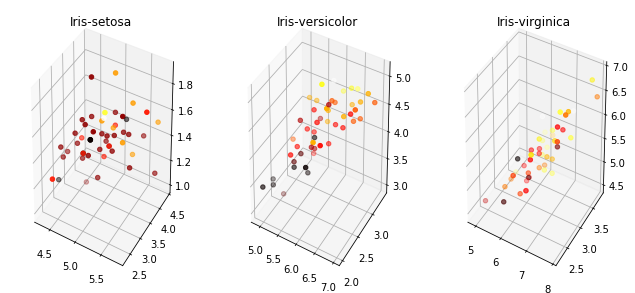

In [54]:
from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(311, projection='3d')

q = df['one'].values
w = df['two'].values
e = df['three'].values
c = df['four'].values


f = plt.figure(figsize=(11,5))
ax1 = f.add_subplot(131,projection='3d',title='Iris-setosa')
ax2 = f.add_subplot(132,projection='3d',title='Iris-versicolor')
ax3 = f.add_subplot(133,projection='3d',title='Iris-virginica')

ax1.scatter(q[:50], w[:50], e[:50], c=c[:50], cmap=plt.hot())

ax2.scatter(q[50:100], w[50:100], e[50:100], c=c[50:100], cmap=plt.hot())

ax3.scatter(q[100:150], w[100:150], e[100:150], c=c[100:150], cmap=plt.hot())

plt.show()

From the 3D representations,

1)Iris-setosa: Maximum height to which a data point of this class reaches is    (1.8). 

2)Iris-versicolor: Range of {length, width, height} of the data points of this class is {(5,7),(2,4),(3,5)}.

3)Iris-virginica: Range of {length, width, height} of the data points of this class is {(5,8),(2,4),(4,7)}.

"Iris-setosa" it is definitely separate and far away from the other two classes, which means that it has no property that is common with the other two classes.

"Iris-versicolor" and "Iris-verginica" have data points in approximately the same ranges of (length) and (width). They both have few data points that share the region of (height), appx. between (4,5). Therefore, these two classes definitely have some properties in common.